# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [ ]:
!curl -O "https://raw.githubusercontent.com/udacity/workspaces-student-support/master/jupyter/workspace_utils.py"

In [78]:
# !wget "http://www.dunescience.org/facesofdune/wp-content/uploads/2018/09/18-0090-10.jpg"
# !wget "http://www.dunescience.org/facesofdune/wp-content/uploads/2018/09/18-0090-06.jpg"
# !wget "https://static.skillshare.com/uploads/parentClasses/9d62dfcf177187fcc372252f077561d1/3e93faaa"
# !mv 3e93faaa 3293faaa.jpg
# !wget "http://www.animalslook.com/media/famous-hollywood-stars-and-other-famous-dogs-in-history-10-pictures/famous-hollywood-stars-and-other-famous-dogs-in-history-10-pictures-6.jpg"
# !wget "http://elelur.com/data_images/articles/famous-dogs-in-history.jpg"
# !wget "https://s3.amazonaws.com/pq-imgs/images/quizzes/scooby-famous-dog.-14329.jpg"

In [82]:
!mkdir test_images
!mv *.jpg test_images/

In [ ]:
!pip install gdown==3.6.0

In [ ]:
def gdown(id):
    my_file_id = id.split("?")[-1][3:]
    !gdown https://drive.google.com/uc?id={my_file_id} 

In [ ]:
from workspace_utils import active_session

In [ ]:
links = []
links.append() = "https://drive.google.com/open?id=1EIDN4BP0VjuOwdsEWld-_BmO2cVwlh3d"
links.append() = "https://drive.google.com/open?id=1--YDzM_NHozgsw2ymrOJIS86L8ulsVup"
links.append() = "https://drive.google.com/open?id=1-2WP-BU_01cmiH-eGOLaCAjkeYTPyfg4"
links.append() = "https://drive.google.com/open?id=1-2NlgSQj9LeiP5s3puH3MlIog-xTxCxc"

for link in links[-1]:
    gdown(link)

In [ ]:
import os
# !cd /content
files = ["dogImages.zip"]#,"lfw.zip"]
for file in files:
  if not os.path.isfile(file):
    !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/{file}
!unzip -q dogImages.zip
!unzip -q lfw.zip

In [ ]:
!ls /data/

In [1]:
project_path = "/data/"

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


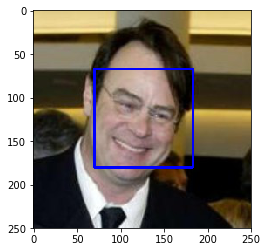

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
def face_show(path):
  # load color (BGR) image
  img = cv2.imread(path)
  # convert BGR image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # find faces in image
  faces = face_cascade.detectMultiScale(gray)

  # print number of faces detected in the image
  print('Number of faces detected:', len(faces))

  # get bounding box for each detected face
  if len(faces) > 0:
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

  # convert BGR image to RGB for plotting
  cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # display the image, along with bounding box
  plt.imshow(cv_rgb)
  plt.show()

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
num_human = 0
num_human_in_dog = 0
for human in tqdm(human_files_short):
  if face_detector(human):
    num_human += 1
  else:
      pass
#     face_show(human)

for dog in tqdm(dog_files_short):
  if face_detector(dog):
    num_human_in_dog += 1
#     face_show(dog)
    
print(f'\nPercent of human pictures with human facesin them: {num_human}%\nPercent of dog pictures with human faces in them: {num_human_in_dog}%')
    


100%|██████████| 100/100 [00:27<00:00,  7.65it/s]


Percent of human pictures with human facesin them: 98%
Percent of dog pictures with human faces in them: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99583930.04it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

valid_transforms = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    VGG16.cuda()
    img = Image.open(img_path)
    img = valid_transforms(img).float()
    img = torch.autograd.Variable(img, requires_grad=False)
    img = img.unsqueeze(0)
    img = img.cuda()
    out = VGG16(img)
    ps = F.softmax(out, dim=1)
    top_p, top_k = ps.topk(1, dim=1)
    top_k = top_k.view(-1,)
    return top_k # predicted class index
  
import random

spot = random.randint(0, 99)
print(dog_files_short[spot])
VGG16_predict(dog_files_short[spot])

/data/dog_images/train/103.Mastiff/Mastiff_06818.jpg


tensor([ 243], device='cuda:0')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
#referenced code from: https://discuss.pytorch.org/t/how-to-classify-single-image-using-loaded-net/1411

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    p = VGG16_predict(img_path)
    if (p >=151) and (p<=268):
      return True 
    else:
      return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
num_dog = 0
num_dog_in_human = 0
for human in tqdm(human_files_short):
  if dog_detector(human):
    num_dog_in_human += 1
  else:
      pass
#     face_show(human)

for dog in tqdm(dog_files_short):
  if dog_detector(dog):
    num_dog += 1
#     face_show(dog)
    
print(f'\nPercentage of human pictures with dogs in them: {num_dog_in_human}%\nPercentage of dogs pictures with dogs in them: {num_dog}%')
    

100%|██████████| 100/100 [00:04<00:00, 21.09it/s]


Percentage of human pictures with dogs in them: 1%
Percentage of dogs pictures with dogs in them: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
# from https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images 
# to deal with truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

use_cuda = True
# project_path = "/content/deep-learning-v2-pytorch/project-dog-classification/"
version_number = "13_1"
file_path = "model_scratch_" + version_number + ".pt"

csv_path = file_path.split(".")[0] + ".csv"
optim_path = file_path.split(".")[0] + ".opt"

In [58]:
batch_size = 128

print(f'Loading Data...')
train_dir = '/data/dog_images/train'
valid_dir = '/data/dog_images/valid'
test_dir = '/data/dog_images/test'


#Define the transforms for the training, validation, and testing sets
print(f'Defining Transforms')
train_transforms = transforms.Compose([transforms.RandomRotation(20),
                                   transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])
print(f'Creating Datasets ')
#Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)


trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)

Loading Data...
Defining Transforms
Creating Datasets 


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?**

My code resizes the training data with a random resize crop, which will output images with both translational and scale variance. For validation and test data the data is only scaled and center-cropped in order to best evaluate testing on naive datasets.

My input tensor is 224x224, I picked this because my research suggested this to be the size of input preferred by the VGG16 network.

**Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?**

I chose to use rotation, random resized crop and random horizontal flip to augment the training data. I did not augment the validation and test datasets.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [17]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv1_bn = nn.BatchNorm2d(16) 
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv2_bn = nn.BatchNorm2d(32) 
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv3_bn = nn.BatchNorm2d(64) 
        self.maxpoola = nn.MaxPool2d(2)
        self.maxpoolb = nn.MaxPool2d(4)
        
        self.fc1 = nn.Linear(7*7*64, 64)
        self.out = nn.Linear(64, 133)    
        self.batch_norm = nn.BatchNorm1d(num_features=64)
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.maxpoola(x)
        x = self.conv1_bn(x)
        x = F.relu(self.conv2(x))
        x = self.maxpoolb(x)
        x = self.conv2_bn(x)
        x = F.relu(self.conv3(x))
        x = self.maxpoolb(x)
        x = self.conv3_bn(x)
        
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = F.relu(self.batch_norm(x))
        x = self.dropout(x)
        x = self.out(x)
#         x = torch.softmax(x, dim=1)
        return x

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I struggled alot with the structure of the network and for a week was unable to get results better than 7% accuracy. With significant research and effort I was able to get sufficient accuracy by reducing the final filter size of the last convolutional layer to a small number like 7x7. 

Most networks I saw in the literature that were designed around simplicity used 3 convolutional layers, which I decided to replicate. I chose to reduce height and width through maxpooling, and in my research learned that batch normalization between convolutional layers can help the model converge, which I initially struggled with. At the end of the convolutional layers I included a 2 layer fully connected layer as a classifier to determine the final output of the network. My goal was to keep the network small in order to reduce complexity, improve training time and as we do not have an extremely large dataset for each of the species of dog.

In the end my convergance issued resulted from the fact that my network was outputting the result of a softmax which I was feeding into the cross entropy loss function, which prefers raw output from the output layer. This resulted in increased error in the loss function and difficulty converging. After resolving that issue I was able to significantly improve the performance of the network.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
# instantiate the CNN
model_scratch = Net()


### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.00030)
# optimizer_scratch = optim.SGD(params=model_scratch.parameters(), lr=0.1, momentum=0.8)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
  
loaders_scratch = {"train" : trainloader,
                  "valid" : validloader,
                  "test" : testloader}



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def save_scratch(model, gpu, checkpoint_name):    
    #saving the model
    torch.save(model.state_dict(), checkpoint_name)

In [20]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, csv_path, optim_path):
    # Load in a pre-trained checkpoint
    #     if False:
    print(f'{file_path}')
    if os.path.isfile(file_path):
        print(f'Pre-trained Checkpoint Found, Loading...')
        model.load_state_dict(torch.load(file_path))
        print(f'finished loading pre-trained checkpoint')
    else:
        print(f'No Pre-trained checkpoint found, continuing without')

    # Load in a pre-trained optimizer
    #     if False:
    print(f'{optim_path}')
    if os.path.isfile(optim_path):
        print(f'Pre-trained Optimizer Found, Loading...')
        optimizer.load_state_dict(torch.load(optim_path))
        print(f'finished loading pre-trained checkpoint')
    else:
        print(f'No Pre-trained optimizer found, continuing without')

    # Load in a prior training data
    print(f'{csv_path}')
    training_data = None
    if os.path.isfile(csv_path):
        print(f'Pre-trained Training Data Found, Loading...')
        training_data = pd.read_csv(csv_path, index_col=0)
        print(f'finished loading previous training data')
    else:
        print(f'No previous training data found, continuing without')
        training_data = pd.DataFrame(columns = ["epoch_number", "training_loss", "valid_loss", "valid_acc"])


#     #setup GDrive Saving
#     #save somewhere where it's not going to disappear(Gdrive)
#     from google.colab import drive
#     drive.mount('/content/gdrive', force_remount= False)

    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    past_epoch = 0
    try:
      past_epoch = int(training_data.iloc[-1]['epoch_number'])
    except:
      pass
    start_epoch = max(past_epoch, 1)
    end_epoch = start_epoch + n_epochs
    for epoch in range(start_epoch+1, end_epoch+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        val_acc = []
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        train_loss = train_loss * 1.0 / len(loaders['train'])    
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['valid'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            out = model(data)
            loss = criterion(out, target)
            valid_loss += loss.item() 
            ps = F.softmax(out, dim=1)
            top_p, top_k = ps.topk(1, dim=1)
            correct = top_k == target.view(top_k.shape)
            accuracy = torch.mean(correct.type(torch.cuda.FloatTensor))
            val_acc.append(accuracy.item())
            if batch_idx == len(loaders['valid'])-2:
                print(f'top_k: {top_k}, target: {target} ')
        
        valid_loss = valid_loss * 1.0 / len(loaders['valid'])
        # print training/validation statistics 
        print('\nEpoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            np.mean(val_acc)
            ))
        ######################    
        # save the model #
        ######################        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
          valid_loss_min = valid_loss
          print(f'\n\n SAVING NEW AND BETTER MODEL!')
          save_scratch(model, use_cuda, save_path)
          save_scratch(optimizer, use_cuda, optim_path)
#         print(training_data)
        training_data = training_data.append({"epoch_number" : epoch, "training_loss" : train_loss, "valid_loss" : valid_loss, "valid_acc" : np.mean(val_acc)}, ignore_index=True)
#         print(training_data)
        print("saving CSV of training data for posterity\n\n")
        training_data.to_csv(csv_path)
#         !cp {csv_path} "/content/gdrive/My Drive/{csv_path.split("/")[-1]}"
#         !cp {project_path + file_path} "/content/gdrive/My Drive/{file_path.split("/")[-1]}"
    # return trained model
    return model

  


In [21]:
from workspace_utils import active_session
# train the model
with active_session():
    model_scratch = train(2, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, file_path, csv_path, optim_path)


# load the model that got the best validation accuracy
# model_scratch.load_state_dict(torch.load(project_path + file_path))

model_scratch_13_1.pt
Pre-trained Checkpoint Found, Loading...


0it [00:00, ?it/s]

finished loading pre-trained checkpoint
model_scratch_13_1.opt
Pre-trained Optimizer Found, Loading...
finished loading pre-trained checkpoint
model_scratch_13_1.csv
Pre-trained Training Data Found, Loading...
finished loading previous training data


53it [02:04,  1.65s/it]
6it [00:12,  2.05s/it]

top_k: tensor([[  56],
        [  87],
        [  86],
        [  94],
        [   5],
        [  62],
        [  31],
        [  10],
        [  53],
        [  43],
        [ 117],
        [   5],
        [  75],
        [   4],
        [  50],
        [  43],
        [ 129],
        [  40],
        [  58],
        [  31],
        [  20],
        [  23],
        [ 129],
        [  26],
        [  48],
        [ 114],
        [  97],
        [  58],
        [  75],
        [  62],
        [  38],
        [   0],
        [  81],
        [  55],
        [  32],
        [  31],
        [  22],
        [ 100],
        [  38],
        [   4],
        [  20],
        [  14],
        [  28],
        [  28],
        [  80],
        [  59],
        [ 130],
        [  22],
        [  18],
        [  31],
        [   2],
        [  75],
        [  83],
        [  31],
        [   0],
        [  22],
        [   4],
        [  19],
        [  55],
        [  13],
        [  75],
        [  53],
 

7it [00:13,  1.69s/it]
0it [00:00, ?it/s]


Epoch: 122 	Training Loss: 3.478941 	Validation Loss: 3.240065 	Validation Accuracy: 0.194413


 SAVING NEW AND BETTER MODEL!
saving CSV of training data for posterity




53it [01:48,  1.68s/it]
6it [00:10,  1.79s/it]

top_k: tensor([[ 100],
        [  16],
        [  86],
        [ 102],
        [  35],
        [  22],
        [  81],
        [ 102],
        [  85],
        [  26],
        [  22],
        [  62],
        [  21],
        [  20],
        [ 123],
        [ 126],
        [  45],
        [  83],
        [  66],
        [  30],
        [  79],
        [  61],
        [ 116],
        [  82],
        [  48],
        [  18],
        [ 116],
        [  13],
        [  14],
        [  38],
        [   4],
        [   4],
        [  11],
        [  77],
        [  58],
        [  14],
        [ 126],
        [  54],
        [ 108],
        [   2],
        [  82],
        [  71],
        [ 106],
        [  57],
        [   2],
        [  51],
        [ 111],
        [  14],
        [  20],
        [  42],
        [  86],
        [  79],
        [  20],
        [  43],
        [ 108],
        [  31],
        [  83],
        [  11],
        [  69],
        [  62],
        [ 126],
        [  83],
 

7it [00:11,  1.48s/it]


Epoch: 123 	Training Loss: 3.457028 	Validation Loss: 3.211545 	Validation Accuracy: 0.201826


 SAVING NEW AND BETTER MODEL!
saving CSV of training data for posterity




In [ ]:
model_scratch = Net()

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.000030)


# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(file_path))

loaders_scratch = {"train" : trainloader,
                  "valid" : validloader,
                  "test" : testloader}

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [23]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.175433


Test Accuracy: 24% (206/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
# from https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images 
# to deal with truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


project_path = "/content/deep-learning-v2-pytorch/project-dog-classification/"
version_number = "01_3"
file_path = "model_transfer_" + version_number + ".pt"

csv_path = file_path.split(".")[0] + ".csv"
optim_path = file_path.split(".")[0] + ".opt"

In [25]:
## TODO: Specify data loaders
batch_size = 64

print(f'Loading Data...')
train_dir = '/data/dog_images/train'
valid_dir = '/data/dog_images/valid'
test_dir = '/data/dog_images/test'


#Define the transforms for the training, validation, and testing sets
print(f'Defining Transforms')
train_transforms = transforms.Compose([transforms.RandomRotation(20),
                                   transforms.RandomResizedCrop(299),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize((299,299)),
                                  transforms.CenterCrop(299),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize((299,299)),
                                  transforms.CenterCrop(299),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])
print(f'Creating Datasets ')
#Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)


trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)


Loading Data...
Defining Transforms
Creating Datasets 


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 84755378.46it/s]


In [27]:
for param in model_transfer.parameters():
  param.requires_grad = False


In [28]:
model_transfer.fc = nn.Linear(2048, 133)
model_transfer.aux_logits=False


In [29]:
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

InceptionV3 is a network which has performed very well in the imagenet competition. Initially I wanted to start with the simplest possibile tranfer learning network and so I setup inceptionV3 and simply replaced the final fully connected layer with a fully connected layer with the appropriate number of outputs. I applied the adam optimizer only to the final fully connected layer as I didn't want to change the weights in the existinging network, only in the classifier. This structure should retain all the feature detection capabilities of InceptionV3 while being able to train a classifier on those features to identify species of dog well.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.000030)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
with active_session():
    # train the model
    n_epochs = 1
    loaders_transfer = {"train" : trainloader,
                      "valid" : validloader,
                      "test" : testloader}


    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, file_path, csv_path, optim_path)

    # load the model that got the best validation accuracy (uncomment the line below)
    #model_transfer.load_state_dict(torch.load('model_transfer.pt'))

model_transfer_01_3.pt
Pre-trained Checkpoint Found, Loading...


0it [00:00, ?it/s]

finished loading pre-trained checkpoint
model_transfer_01_3.opt
Pre-trained Optimizer Found, Loading...
finished loading pre-trained checkpoint
model_transfer_01_3.csv
Pre-trained Training Data Found, Loading...
finished loading previous training data


105it [03:07,  1.37s/it]
14it [00:22,  1.25s/it]

top_k: tensor([[ 112],
        [  13],
        [  89],
        [  81],
        [  26],
        [  61],
        [  55],
        [  46],
        [  27],
        [  27],
        [  58],
        [  62],
        [  22],
        [   4],
        [  87],
        [  62],
        [   0],
        [  14],
        [   4],
        [  86],
        [   1],
        [  64],
        [  71],
        [  51],
        [  91],
        [  88],
        [  90],
        [  28],
        [ 132],
        [  22],
        [  51],
        [  31],
        [  62],
        [  40],
        [  88],
        [  34],
        [ 103],
        [  55],
        [  86],
        [  40],
        [  78],
        [  10],
        [  24],
        [  66],
        [  71],
        [  54],
        [  67],
        [  24],
        [ 126],
        [  40],
        [  31],
        [  73],
        [  21],
        [  46],
        [  38],
        [  30],
        [  22],
        [  35],
        [  80],
        [  26],
        [  26],
        [  71],
 

saving CSV of training data for posterity




### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 2.510959


Test Accuracy: 72% (607/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [66]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

InceptionV3_transform = transforms.Compose([transforms.Resize((299,299)),
                                  transforms.CenterCrop(299),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])])

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    img = InceptionV3_transform(img).float()
    img = torch.autograd.Variable(img, requires_grad=False)
    img = img.unsqueeze(0)
    img = img.cuda()
    out = model_transfer(img)
    ps = F.softmax(out, dim=1)
    top_p, top_k = ps.topk(1, dim=1)
    top_k = top_k.view(-1,)
    return train_data.classes[top_k][4:] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [96]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    print("\n")
    has_dog = False
    has_human = False
    label = predict_breed_transfer(img_path)
    if dog_detector(img_path):
        has_dog = True
        print(f'It\'s a dog!\nPredicted Breed is: {label}')
        #TODO return breed
      
    if face_detector(img_path):
        has_human = True
        print(f'It\'s a person!\nThis person looks like a: {label}')
      #TODO return breed
    if (not has_dog and not has_human):
      print("There may be a mistake, there are neither dogs nor humans in this image")
    return label
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output is about what I expected. I don't know dog breeds too well so the degree to which humans represent those particular breed is beyond my ability to comment. The accuracy on other dog breeds seem to be okay. It does not identify Scooby-Doo as a dog so I think that's probably good for the algorithm. The algorithm also identifies a portrait of a person which I think is pretty good.

1. Improving the facial detection algorithm - The CV2 algorithm is pretty good, but is not 100%. I feel that an algorithm based on deep learning would be particularly effictive at this task and, had it not taken me a week to troubleshoot my scratch network for breed detection, may have taken a shot at trying to improve those results.

2. Visualising the results - I did not invest much time in having the images shown with the predicted and actual results shown in a way that is particularly intuitive to interpret during training and testing.

3. Confusion matrix to improve results - Were I to try and maximize the accuracy of each network I would want to build a confusion matrix to see what each of the predictions is being mistaken as, that way I could go find more images of those categories in order to improve the results in a directed manner.



It's a person!
This person looks like a: Bull_terrier
/home/workspace/dog_project/test_images/18-0090-06.jpg


There may be a mistake, there are neither dogs nor humans in this image
/home/workspace/dog_project/test_images/scooby-famous-dog.-14329.jpg


It's a person!
This person looks like a: Bull_terrier
/home/workspace/dog_project/test_images/18-0090-10.jpg


It's a dog!
Predicted Breed is: Golden_retriever
/home/workspace/dog_project/test_images/famous-dogs-in-history.jpg


It's a person!
This person looks like a: Maltese
/home/workspace/dog_project/test_images/3293faaa.jpg


It's a dog!
Predicted Breed is: Collie
/home/workspace/dog_project/test_images/famous-hollywood-stars-and-other-famous-dogs-in-history-10-pictures-6.jpg


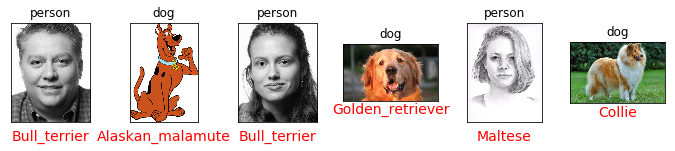

In [106]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# def imshow(img):
#   img = img / 2 + 0.5
#   plt.imshow(np.transpose(img, (1, 2, 0)))

# images, labels = iter(trainLoader).next()
# images = images.numpy()
# for idx in np.arange(20):
#   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#   imshow(images[idx])
#   ax.set_title(classes[labels[idx]])


fig = plt.figure(figsize=(20,4))

classes = {"scooby-famous-dog.-14329.jpg" : "dog",
          "18-0090-10.jpg" : "person",
          "18-0090-06.jpg" : "person",
          "famous-dogs-in-history.jpg" : "dog",
          "3293faaa.jpg" : "person",
          "famous-hollywood-stars-and-other-famous-dogs-in-history-10-pictures-6.jpg" : "dog",
           
          }
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

## suggested code, below
for idx, file in enumerate(os.listdir("test_images")):
    path = "/home/workspace/dog_project/test_images/" + file
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    img = mpimg.imread(path)
    plt.imshow(img)
    ax.set_title(classes[file])
    label = run_app(path)
    ax.text(0.5*(left+right), -0.15, label,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, color='red',
        transform=ax.transAxes)
    print(path)
    
    